In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [65]:
data = pd.read_excel(r'C:\Users\PREM\Desktop\Assignment of DSA\iris (1).xls')

In [66]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Basic information of dataset

In [67]:
 data.shape

(150, 5)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [69]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [70]:
data = data.dropna()

In [71]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [72]:
data['SL']=data['SL'].fillna(data['SL'].median())

In [73]:
data['SL'].isna().sum()

0

In [74]:
for col in ['SW','PL']:
    data[col]=data[col].fillna(data[col].median())

In [75]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Outlier Handling

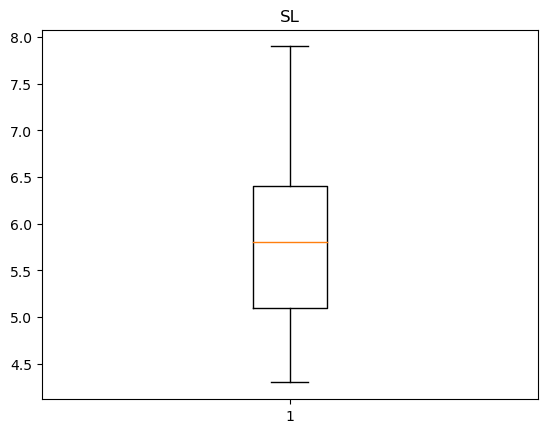

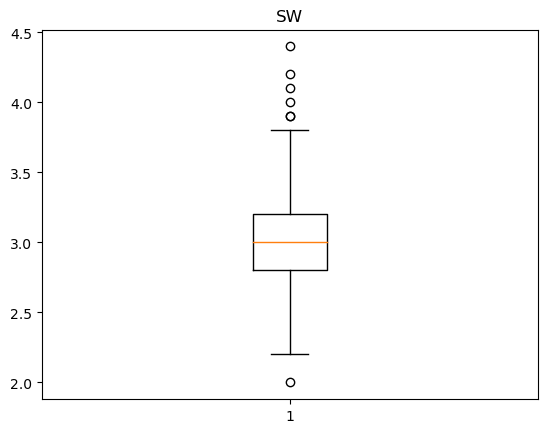

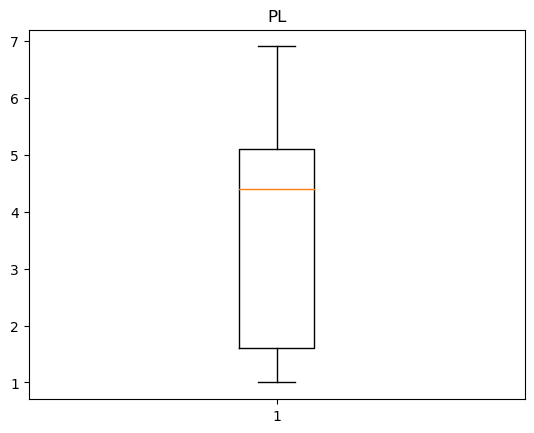

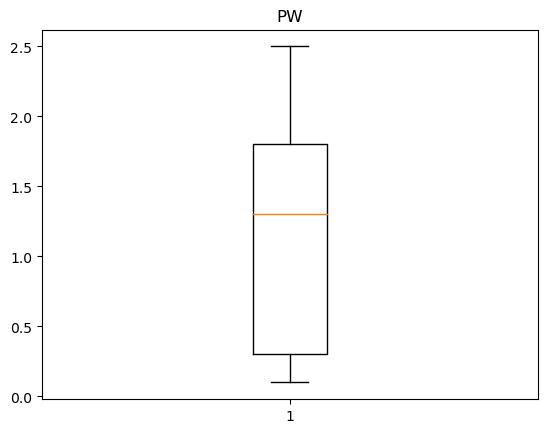

In [76]:
num_cols =['SL', 'SW', 'PL','PW']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [77]:
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.2


C:\Users\PREM\AppData\Local\Temp\ipykernel_13008\3849605448.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
C:\Users\PREM\AppData\Local\Temp\ipykernel_13008\3849605448.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
C:\Users\PREM\AppData\Local\Temp\ipykernel_13008\3849605448.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 

In [78]:
data['SW'].median()
IQR = Q3-Q1
print(IQR)

0.40000000000000036


In [79]:
up_lim = Q3+1.5*IQR
low_lim =Q1-1.5*IQR
print(up_lim)
print(low_lim)

3.8000000000000007
2.1999999999999993


In [80]:
outliers = []
for x in data['SW']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)

In [81]:
outliers

[3.9, 4.0, 4.4, 3.9, 4.1, 4.2, 2.0]

In [82]:
ind1 =data['SW']>up_lim
data.loc[ind1].index

Int64Index([5, 14, 15, 16, 32, 33], dtype='int64')

In [83]:
data.drop([5, 14, 15, 16, 32, 33],inplace=True)

In [84]:
data.shape

(125, 5)

{'whiskers': [<matplotlib.lines.Line2D at 0x21a867cd7b0>,
 'caps': [<matplotlib.lines.Line2D at 0x21a867cdb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a867cf6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x21a867ccd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a867ccc10>],
 'means': []}

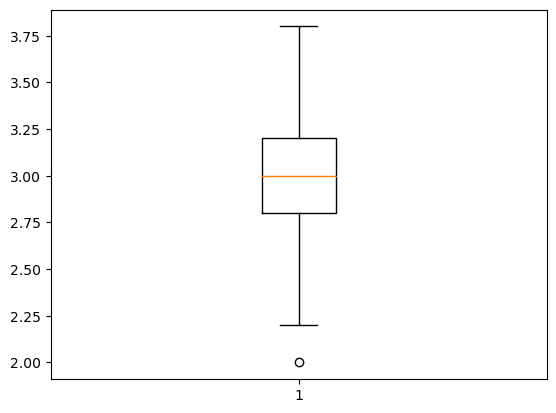

In [85]:
plt.boxplot(data['SW'])

# Classification column is categorical form whereas rest all the columns are in the numerical form.
The target column is "Classification"

In [86]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

# plotting graph using seaborn

C:\Users\PREM\AppData\Local\Temp\ipykernel_13008\4257180653.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix =data.corr()


<Axes: >

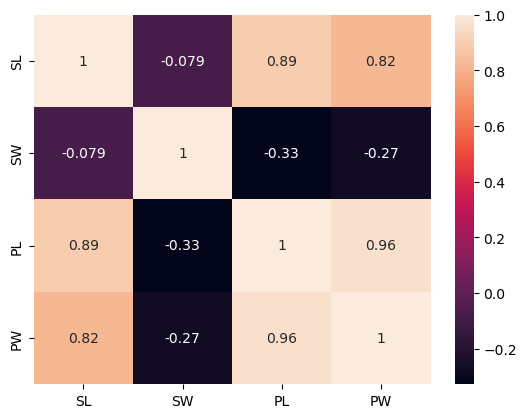

In [87]:
corrmatrix =data.corr()
sns.heatmap(corrmatrix,annot =True)

# LabelEncoding to convert the categorical value to numerical

In [88]:
encode = LabelEncoder()
data.Classification = encode.fit_transform(data.Classification)

In [89]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
6,4.6,3.4,1.4,0.3,0


In [90]:
data.Classification.unique()

array([0, 1, 2])

# Train test split

# splitting data to feature and target

In [91]:
X = data.drop(columns = ['Classification'], axis = 1)
y = data['Classification']

In [92]:
X.describe()

,SL,SW,PL,PW
count,125.000000,125.000000,125.000000,125.00000
mean,5.884000,2.983200,3.929600,1.25360
std,0.844374,0.377969,1.720747,0.74688
min,4.300000,2.000000,1.000000,0.10000
25%,5.100000,2.800000,1.700000,0.30000
50%,5.800000,3.000000,4.400000,1.40000
75%,6.400000,3.200000,5.100000,1.80000
max,7.900000,3.800000,6.900000,2.50000


# After MinMax Scaling

In [93]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
min_max = MinMaxScaler()
X = min_max.fit_transform(X)
type(X)

numpy.ndarray

In [95]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [96]:
X = pd.DataFrame(X,columns=['SL','SW','PL','PW'])

In [97]:
X.describe()

,SL,SW,PL,PW
count,125.000000,125.000000,125.000000,125.000000
mean,0.440000,0.546222,0.496542,0.480667
std,0.234548,0.209983,0.291652,0.311200
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.444444,0.118644,0.083333
50%,0.416667,0.555556,0.576271,0.541667
75%,0.583333,0.666667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [99]:
print(X_train.shape ,y_train.shape)

(100, 4) (100,)


In [100]:
print(X_test.shape ,y_test.shape)

(25, 4) (25,)


# Data Modelling

In [101]:
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred_lr = logit_model.predict(X_test)

In [102]:
print('Accuracy =',accuracy_score(y_test,y_pred_lr))

Accuracy = 0.88


In [103]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
print('Precision =',precision_score(y_test,y_pred_lr,pos_label='positive',average='micro'))
print('Recall =',recall_score(y_test,y_pred_lr,pos_label='positive',average='micro'))
print('f1 score =',f1_score(y_test,y_pred_lr,pos_label='positive',average='micro'))

Precision = 0.88
Recall = 0.88
f1 score = 0.88


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [104]:
confusion_matrix(y_test,y_pred_lr)

array([[7, 0, 0],
       [0, 8, 1],
       [0, 2, 7]], dtype=int64)

In [105]:
y_pred_lr

array([0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 1, 1, 2,
       2, 1, 0])

In [106]:
y_test

11     0
66     1
59     1
35     0
80     1
120    2
70     1
112    2
9      0
134    2
13     0
89     1
119    2
64     1
107    2
3      0
121    2
104    2
31     0
61     1
73     1
113    2
115    2
78     1
23     0
Name: Classification, dtype: int32

# K -Nearest Neighbor

In [107]:
from sklearn.neighbors import KNeighborsClassifier
metric= []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn =classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

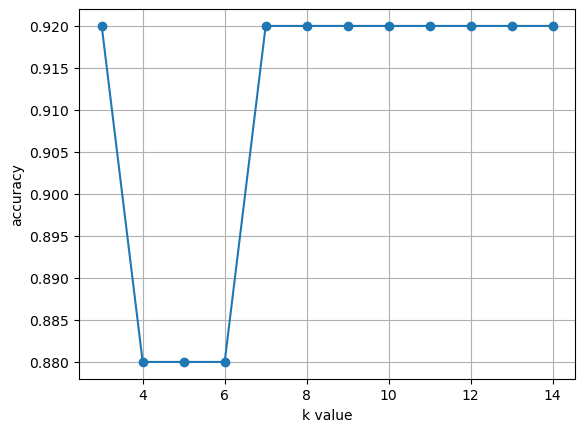

In [108]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

# Before MinMax Scaling

In [109]:
X1 = data.drop(columns = ['Classification'], axis = 1)
y1 = data['Classification']

In [110]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=0)

In [111]:
print(X1_train.shape ,y1_train.shape)

(100, 4) (100,)


In [112]:
print(X1_test.shape ,y1_test.shape)

(25, 4) (25,)


# Data Modelling

In [113]:
logit_model = LogisticRegression()
logit_model.fit(X1_train,y1_train)
y1_pred_lr = logit_model.predict(X1_test)

In [114]:
print('Accuracy =',accuracy_score(y1_test,y1_pred_lr))

Accuracy = 0.92


In [115]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
print('Precision =',precision_score(y1_test,y1_pred_lr,pos_label='positive',average='micro'))
print('Recall =',recall_score(y1_test,y1_pred_lr,pos_label='positive',average='micro'))
print('f1 score =',f1_score(y1_test,y1_pred_lr,pos_label='positive',average='micro'))

Precision = 0.92
Recall = 0.92
f1 score = 0.92


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [116]:
confusion_matrix(y1_test,y1_pred_lr)

array([[7, 0, 0],
       [0, 8, 1],
       [0, 1, 8]], dtype=int64)

In [117]:
y1_pred_lr

array([0, 1, 1, 0, 1, 2, 2, 2, 0, 2, 0, 1, 1, 1, 2, 0, 2, 2, 0, 1, 1, 2,
       2, 1, 0])

In [118]:
y1_test

11     0
66     1
59     1
35     0
80     1
120    2
70     1
112    2
9      0
134    2
13     0
89     1
119    2
64     1
107    2
3      0
121    2
104    2
31     0
61     1
73     1
113    2
115    2
78     1
23     0
Name: Classification, dtype: int32

# K -Nearest Neighbor

In [119]:
from sklearn.neighbors import KNeighborsClassifier
metric= []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(X1_train,y1_train)
    y1_pred_knn =classifier.predict(X1_test)
    acc = accuracy_score(y1_test,y1_pred_knn)
    metric.append(acc)

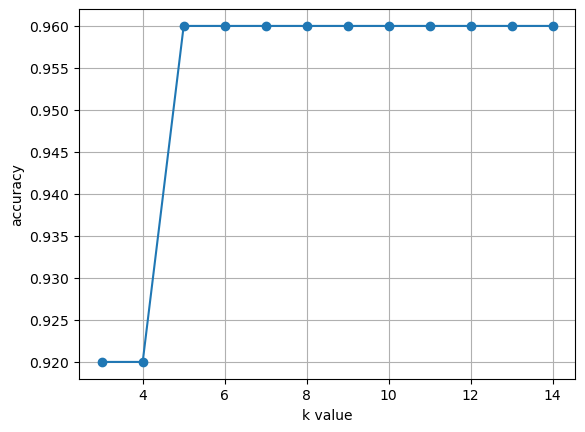

In [120]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()